# Industry 4.0 의 중심, AI - ML&DL

<div align='right'><font size=2 color='gray'>Machine Learning & Deep Learning with TensorFlow @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, 김진수</font></div>
<hr>

# Sect12. RNN (Recurrent Newural Network)

In [1]:
from images import bigpycraft_ai as bpc
from IPython.display import Image 
from tqdm import tqdm_notebook

In [2]:
import time
import os

def chk_processting_time(start_time, end_time):
    process_time = end_time - start_time
    p_time = int(process_time)
    p_min = p_time // 60
    p_sec = p_time %  60
    print('처리시간 : {p_min}분 {p_sec}초 경과되었습니다.'.format(
            p_min = p_min, 
            p_sec = p_sec
        ))
    return process_time

### 12-5. rnn_stock_prediction

<hr>

In [3]:
%%writefile ./modules/rnn_stock_prediction.py

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.set_random_seed(777)  # reproducibility


def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)


timesteps = seq_length = 7
data_dim = 5
output_dim = 1

# Open, High, Low, Volume, Close
xy = np.loadtxt('./data/data-02-stock_daily.csv', delimiter=',')
xy = xy[::-1]  # reverse order (chronically ordered)
xy = MinMaxScaler(xy)
x = xy
y = xy[:, [-1]]  # Close as label

dataX = []
dataY = []
for i in range(0, len(y) - seq_length):
    _x = x[i:i + seq_length]
    _y = y[i + seq_length]  # Next close price
    print(_x, "->", _y)
    dataX.append(_x)
    dataY.append(_y)

# split to train and testing
train_size = int(len(dataY) * 0.7)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(
    dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(
    dataY[train_size:len(dataY)])

# input place holders
X = tf.placeholder(tf.float32, [None, seq_length, data_dim])
Y = tf.placeholder(tf.float32, [None, 1])

cell = tf.contrib.rnn.BasicLSTMCell(num_units=output_dim, state_is_tuple=True)
outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
Y_pred = outputs[:, -1]  # We use the last cell's output

print(outputs[:, -1])

# cost/loss
loss = tf.reduce_sum(tf.square(Y_pred - Y))  # sum of the squares
# optimizer
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

# RMSE
targets = tf.placeholder(tf.float32, [None, 1])
predictions = tf.placeholder(tf.float32, [None, 1])
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions)))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(500):
    _, step_loss = sess.run([train, loss], feed_dict={X: trainX, Y: trainY})
    print(i, step_loss)

testPredict = sess.run(Y_pred, feed_dict={X: testX})
print("RMSE", sess.run(rmse, feed_dict={
      targets: testY, predictions: testPredict}))
plt.plot(testY)
plt.plot(testPredict)
plt.xlabel("Time Period")
plt.ylabel("Stock Price")
plt.show()



Overwriting ./modules/rnn_stock_prediction.py


C:\Python\Anaconda3-50\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


[[2.13751054e-01 2.08179810e-01 1.91791832e-01 4.66075110e-04
  1.92092403e-01]
 [1.93935034e-01 2.03641926e-01 2.08664571e-01 2.98467330e-03
  1.96551555e-01]
 [2.10516454e-01 2.05289413e-01 2.03558748e-01 2.59926504e-04
  1.87749731e-01]
 [1.86678765e-01 2.09480567e-01 2.08781843e-01 0.00000000e+00
  2.17448151e-01]
 [3.06973882e-01 3.14634137e-01 2.18993665e-01 1.24764722e-02
  2.16981885e-01]
 [2.19142110e-01 2.63907214e-01 2.24686396e-01 4.56323384e-01
  2.24967473e-01]
 [2.33129931e-01 2.36419163e-01 1.62682724e-01 5.70171193e-01
  1.47442742e-01]] -> [0.13289962]
[[1.93935034e-01 2.03641926e-01 2.08664571e-01 2.98467330e-03
  1.96551555e-01]
 [2.10516454e-01 2.05289413e-01 2.03558748e-01 2.59926504e-04
  1.87749731e-01]
 [1.86678765e-01 2.09480567e-01 2.08781843e-01 0.00000000e+00
  2.17448151e-01]
 [3.06973882e-01 3.14634137e-01 2.18993665e-01 1.24764722e-02
  2.16981885e-01]
 [2.19142110e-01 2.63907214e-01 2.24686396e-01 4.56323384e-01
  2.24967473e-01]
 [2.33129931e-01 2.3641

 [0.09459257 0.10681264 0.10657706 0.17008156 0.11308129]] -> [0.10311379]
[[0.10321823 0.10311292 0.10141251 0.16807385 0.09504062]
 [0.08118761 0.08302449 0.08175214 0.18754145 0.06886882]
 [0.06565526 0.06539287 0.04472012 0.29825222 0.07169585]
 [0.06483929 0.09678302 0.08439305 0.24120283 0.10244347]
 [0.09602047 0.09256286 0.10258633 0.15624272 0.09941237]
 [0.09459257 0.10681264 0.10657706 0.17008156 0.11308129]
 [0.11397145 0.10990542 0.11165361 0.15063189 0.10311379]] -> [0.102764]
[[0.08118761 0.08302449 0.08175214 0.18754145 0.06886882]
 [0.06565526 0.06539287 0.04472012 0.29825222 0.07169585]
 [0.06483929 0.09678302 0.08439305 0.24120283 0.10244347]
 [0.09602047 0.09256286 0.10258633 0.15624272 0.09941237]
 [0.09459257 0.10681264 0.10657706 0.17008156 0.11308129]
 [0.11397145 0.10990542 0.11165361 0.15063189 0.10311379]
 [0.08791917 0.09516437 0.09906505 0.09108183 0.102764  ]] -> [0.06583772]
[[0.06565526 0.06539287 0.04472012 0.29825222 0.07169585]
 [0.06483929 0.09678302

 [0.19276932 0.18895855 0.20056566 0.15803531 0.19626009]] -> [0.17888975]
[[0.13544847 0.14921528 0.15616836 0.1441158  0.15303849]
 [0.15331207 0.16667336 0.16473673 0.17246572 0.17530499]
 [0.1787815  0.20239902 0.19598802 0.18788205 0.21392171]
 [0.20375565 0.20771739 0.21550166 0.1473604  0.20147697]
 [0.20020037 0.19661804 0.20878184 0.12065968 0.19681376]
 [0.19276932 0.18895855 0.20056566 0.15803531 0.19626009]
 [0.19247789 0.18765779 0.17069346 0.12791073 0.17888975]] -> [0.1526887]
[[0.15331207 0.16667336 0.16473673 0.17246572 0.17530499]
 [0.1787815  0.20239902 0.19598802 0.18788205 0.21392171]
 [0.20375565 0.20771739 0.21550166 0.1473604  0.20147697]
 [0.20020037 0.19661804 0.20878184 0.12065968 0.19681376]
 [0.19276932 0.18895855 0.20056566 0.15803531 0.19626009]
 [0.19247789 0.18765779 0.17069346 0.12791073 0.17888975]
 [0.16418175 0.16291579 0.16136218 0.16659496 0.1526887 ]] -> [0.15187264]
[[0.1787815  0.20239902 0.19598802 0.18788205 0.21392171]
 [0.20375565 0.2077173

 [0.24050266 0.24248919 0.25306187 0.19978489 0.24682604]] -> [0.24111364]
[[0.18125864 0.17806158 0.18437358 0.40337008 0.18597188]
 [0.17630454 0.19950862 0.19569456 0.13703505 0.21100727]
 [0.20556236 0.22160877 0.21553094 0.19711392 0.21004549]
 [0.20576639 0.24274924 0.22788476 0.17579995 0.2509354 ]
 [0.25163471 0.24994648 0.24733986 0.15541812 0.24321202]
 [0.24050266 0.24248919 0.25306187 0.19978489 0.24682604]
 [0.24481558 0.24162202 0.25584951 0.11703863 0.24111364]] -> [0.26265148]
[[0.17630454 0.19950862 0.19569456 0.13703505 0.21100727]
 [0.20556236 0.22160877 0.21553094 0.19711392 0.21004549]
 [0.20576639 0.24274924 0.22788476 0.17579995 0.2509354 ]
 [0.25163471 0.24994648 0.24733986 0.15541812 0.24321202]
 [0.24050266 0.24248919 0.25306187 0.19978489 0.24682604]
 [0.24481558 0.24162202 0.25584951 0.11703863 0.24111364]
 [0.24382483 0.25558275 0.26142496 0.12906695 0.26265148]] -> [0.26167525]
[[0.20556236 0.22160877 0.21553094 0.19711392 0.21004549]
 [0.20576639 0.242749

 [0.27223762 0.27899516 0.28520232 0.08773864 0.2857633 ]] -> [0.27122]
[[0.28296159 0.2844869  0.28661069 0.18411759 0.28246982]
 [0.27995992 0.29966171 0.30235971 0.15158197 0.29782917]
 [0.28727451 0.29445885 0.30793499 0.10981447 0.30144301]
 [0.29665798 0.29922812 0.30579281 0.09206776 0.29377796]
 [0.27902749 0.2771453  0.29188389 0.08286278 0.28115842]
 [0.27223762 0.27899516 0.28520232 0.08773864 0.2857633 ]
 [0.27421911 0.27090191 0.28156952 0.12027427 0.27122   ]] -> [0.27649521]
[[0.27995992 0.29966171 0.30235971 0.15158197 0.29782917]
 [0.28727451 0.29445885 0.30793499 0.10981447 0.30144301]
 [0.29665798 0.29922812 0.30579281 0.09206776 0.29377796]
 [0.27902749 0.2771453  0.29188389 0.08286278 0.28115842]
 [0.27223762 0.27899516 0.28520232 0.08773864 0.2857633 ]
 [0.27421911 0.27090191 0.28156952 0.12027427 0.27122   ]
 [0.26780806 0.27032397 0.28299261 0.09039168 0.27649521]] -> [0.23038841]
[[0.28727451 0.29445885 0.30793499 0.10981447 0.30144301]
 [0.29665798 0.29922812 

 [0.26247514 0.25731692 0.26832078 0.12131397 0.25545288]] -> [0.24863296]
[[0.23738453 0.25590064 0.25951751 0.11438559 0.2611651 ]
 [0.2632911  0.26408058 0.28299261 0.08700367 0.27486309]
 [0.26585563 0.26223072 0.27879643 0.09221117 0.26795577]
 [0.25985247 0.25587181 0.27460024 0.08128529 0.26469172]
 [0.25918222 0.25799905 0.27313315 0.07000986 0.26233095]
 [0.26247514 0.25731692 0.26832078 0.12131397 0.25545288]
 [0.25239234 0.24806761 0.26121951 0.14624899 0.24863296]] -> [0.22863964]
[[0.2632911  0.26408058 0.28299261 0.08700367 0.27486309]
 [0.26585563 0.26223072 0.27879643 0.09221117 0.26795577]
 [0.25985247 0.25587181 0.27460024 0.08128529 0.26469172]
 [0.25918222 0.25799905 0.27313315 0.07000986 0.26233095]
 [0.26247514 0.25731692 0.26832078 0.12131397 0.25545288]
 [0.25239234 0.24806761 0.26121951 0.14624899 0.24863296]
 [0.24076502 0.23850041 0.24221339 0.15195841 0.22863964]] -> [0.22339369]
[[0.26585563 0.26223072 0.27879643 0.09221117 0.26795577]
 [0.25985247 0.255871

 [0.26868234 0.2626643  0.27418952 0.13117325 0.25816326]] -> [0.2781564]
[[0.22762223 0.24720044 0.24971659 0.13197096 0.25472422]
 [0.24874968 0.26460085 0.26766042 0.1510173  0.26877183]
 [0.26911948 0.27043949 0.28592698 0.12876221 0.28188707]
 [0.28223302 0.29049908 0.29913189 0.33420274 0.30173448]
 [0.28899382 0.28318331 0.28140806 0.15072152 0.27634948]
 [0.26868234 0.2626643  0.27418952 0.13117325 0.25816326]
 [0.2529752  0.27069971 0.27278097 0.15418123 0.2781564 ]] -> [0.24047238]
[[0.24874968 0.26460085 0.26766042 0.1510173  0.26877183]
 [0.26911948 0.27043949 0.28592698 0.12876221 0.28188707]
 [0.28223302 0.29049908 0.29913189 0.33420274 0.30173448]
 [0.28899382 0.28318331 0.28140806 0.15072152 0.27634948]
 [0.26868234 0.2626643  0.27418952 0.13117325 0.25816326]
 [0.2529752  0.27069971 0.27278097 0.15418123 0.2781564 ]
 [0.27072216 0.26593044 0.25417696 0.17191001 0.24047238]] -> [0.24641792]
[[0.26911948 0.27043949 0.28592698 0.12876221 0.28188707]
 [0.28223302 0.2904990

 [0.08899731 0.08906551 0.09257996 0.20868513 0.09906258]] -> [0.11704492]
[[0.12895002 0.14803021 0.13383762 0.19849422 0.13228744]
 [0.10595755 0.10643691 0.09020323 0.33265215 0.10923414]
 [0.07095892 0.09669616 0.08051977 0.33168414 0.0931463 ]
 [0.09500047 0.10117638 0.06153422 0.49577844 0.05426728]
 [0.04312908 0.07452666 0.0602724  0.2330017  0.08245015]
 [0.08899731 0.08906551 0.09257996 0.20868513 0.09906258]
 [0.1026937  0.12666986 0.12101434 0.26093932 0.11704492]] -> [0.14989091]
[[0.10595755 0.10643691 0.09020323 0.33265215 0.10923414]
 [0.07095892 0.09669616 0.08051977 0.33168414 0.0931463 ]
 [0.09500047 0.10117638 0.06153422 0.49577844 0.05426728]
 [0.04312908 0.07452666 0.0602724  0.2330017  0.08245015]
 [0.08899731 0.08906551 0.09257996 0.20868513 0.09906258]
 [0.1026937  0.12666986 0.12101434 0.26093932 0.11704492]
 [0.13017388 0.1481169  0.1417018  0.20981447 0.14989091]] -> [0.13765005]
[[0.07095892 0.09669616 0.08051977 0.33168414 0.0931463 ]
 [0.09500047 0.101176

 [0.12487021 0.13285541 0.13677199 0.17519943 0.12380651]] -> [0.12951873]
[[0.15689641 0.16175956 0.17236619 0.08582952 0.16828119]
 [0.16243337 0.15748172 0.16905019 0.10053778 0.15959602]
 [0.16071405 0.15557419 0.16409109 0.11933315 0.1539712 ]
 [0.151622   0.14655609 0.16018836 0.11486959 0.15111491]
 [0.14258809 0.13820262 0.13645213 0.15399301 0.12811975]
 [0.12487021 0.13285541 0.13677199 0.17519943 0.12380651]
 [0.11758487 0.12216082 0.12477034 0.12407457 0.12951873]] -> [0.12322359]
[[0.16243337 0.15748172 0.16905019 0.10053778 0.15959602]
 [0.16071405 0.15557419 0.16409109 0.11933315 0.1539712 ]
 [0.151622   0.14655609 0.16018836 0.11486959 0.15111491]
 [0.14258809 0.13820262 0.13645213 0.15399301 0.12811975]
 [0.12487021 0.13285541 0.13677199 0.17519943 0.12380651]
 [0.11758487 0.12216082 0.12477034 0.12407457 0.12951873]
 [0.10665704 0.11311388 0.12770471 0.13941024 0.12322359]] -> [0.13100512]
[[0.16071405 0.15557419 0.16409109 0.11933315 0.1539712 ]
 [0.151622   0.146556

 [0.00684819 0.03186407 0.02714311 0.25770368 0.03596449]] -> [0.05406331]
[[0.11198978 0.11664006 0.11150688 0.15275612 0.0976636 ]
 [0.09660332 0.10967421 0.11602579 0.14366765 0.10430872]
 [0.08410171 0.09400814 0.0912596  0.17805862 0.07609668]
 [0.08185786 0.07839993 0.07544322 0.25145648 0.06193242]
 [0.04927787 0.04935107 0.00422555 0.35460249 0.00827705]
 [0.00684819 0.03186407 0.02714311 0.25770368 0.03596449]
 [0.05332852 0.0517212  0.05029548 0.26161154 0.05406331]] -> [0.06936416]
[[0.09660332 0.10967421 0.11602579 0.14366765 0.10430872]
 [0.08410171 0.09400814 0.0912596  0.17805862 0.07609668]
 [0.08185786 0.07839993 0.07544322 0.25145648 0.06193242]
 [0.04927787 0.04935107 0.00422555 0.35460249 0.00827705]
 [0.00684819 0.03186407 0.02714311 0.25770368 0.03596449]
 [0.05332852 0.0517212  0.05029548 0.26161154 0.05406331]
 [0.04913216 0.06284938 0.05678336 0.33004392 0.06936416]] -> [0.09419549]
[[0.08410171 0.09400814 0.0912596  0.17805862 0.07609668]
 [0.08185786 0.078399

 [0.01561974 0.03530366 0.03650384 0.2052792  0.04526157]] -> [0.04182254]
[[0.02946185 0.02585198 0.02121565 0.18494219 0.01055033]
 [0.00084512 0.         0.         0.20783365 0.        ]
 [0.01221018 0.02024455 0.0141731  0.21175047 0.01057949]
 [0.         0.02096719 0.0159631  0.19786681 0.02424832]
 [0.03182226 0.02804874 0.02993083 0.24270861 0.02692962]
 [0.01561974 0.03530366 0.03650384 0.2052792  0.04526157]
 [0.04764595 0.04776134 0.05415708 0.1993457  0.04182254]] -> [0.07428976]
[[0.00084512 0.         0.         0.20783365 0.        ]
 [0.01221018 0.02024455 0.0141731  0.21175047 0.01057949]
 [0.         0.02096719 0.0159631  0.19786681 0.02424832]
 [0.03182226 0.02804874 0.02993083 0.24270861 0.02692962]
 [0.01561974 0.03530366 0.03650384 0.2052792  0.04526157]
 [0.04764595 0.04776134 0.05415708 0.1993457  0.04182254]
 [0.03671794 0.06735843 0.05469703 0.20263512 0.07428976]] -> [0.12194108]
[[0.01221018 0.02024455 0.0141731  0.21175047 0.01057949]
 [0.         0.020967

 [0.15205896 0.15615213 0.157078   0.14420543 0.14656836]] -> [0.13741692]
[[0.097186   0.10412462 0.1128567  0.11291566 0.10282233]
 [0.10097438 0.12060001 0.11549761 0.1561262  0.129373  ]
 [0.11845916 0.12276776 0.13444788 0.12277494 0.12654596]
 [0.12414164 0.14117987 0.13824788 0.14451017 0.14683074]
 [0.14191785 0.15589208 0.16306418 0.16961549 0.16455069]
 [0.15205896 0.15615213 0.157078   0.14420543 0.14656836]
 [0.13623536 0.14311641 0.1465729  0.12952407 0.13741692]] -> [0.14665576]
[[0.10097438 0.12060001 0.11549761 0.1561262  0.129373  ]
 [0.11845916 0.12276776 0.13444788 0.12277494 0.12654596]
 [0.12414164 0.14117987 0.13824788 0.14451017 0.14683074]
 [0.14191785 0.15589208 0.16306418 0.16961549 0.16455069]
 [0.15205896 0.15615213 0.157078   0.14420543 0.14656836]
 [0.13623536 0.14311641 0.1465729  0.12952407 0.13741692]
 [0.12644381 0.13623724 0.14803999 0.08794479 0.14665576]] -> [0.13523114]
[[0.11845916 0.12276776 0.13444788 0.12277494 0.12654596]
 [0.12414164 0.141179

 [0.16627989 0.16713578 0.17735455 0.16111858 0.16988405]] -> [0.19512332]
[[0.20282304 0.19907503 0.19710311 0.15993547 0.18203751]
 [0.17627547 0.17968023 0.18521874 0.16248095 0.17087509]
 [0.17152541 0.17456424 0.1845731  0.12384153 0.18349464]
 [0.17149616 0.18043171 0.16626255 0.15197634 0.15962527]
 [0.16406529 0.17595168 0.17148582 0.14636551 0.1805802 ]
 [0.16627989 0.16713578 0.17735455 0.16111858 0.16988405]
 [0.16858206 0.18442049 0.17442019 0.19060679 0.19512332]] -> [0.1907225]
[[0.17627547 0.17968023 0.18521874 0.16248095 0.17087509]
 [0.17152541 0.17456424 0.1845731  0.12384153 0.18349464]
 [0.17149616 0.18043171 0.16626255 0.15197634 0.15962527]
 [0.16406529 0.17595168 0.17148582 0.14636551 0.1805802 ]
 [0.16627989 0.16713578 0.17735455 0.16111858 0.16988405]
 [0.16858206 0.18442049 0.17442019 0.19060679 0.19512332]
 [0.18866044 0.18736874 0.20125529 0.10659676 0.1907225 ]] -> [0.19762982]
[[0.17152541 0.17456424 0.1845731  0.12384153 0.18349464]
 [0.17149616 0.1804317

 [0.09922599 0.1120155  0.10464033 0.20712557 0.11652032]] -> [0.12022156]
[[0.12743474 0.13837616 0.14912581 0.10492068 0.14298359]
 [0.13515704 0.13288424 0.14064544 0.13891727 0.14056467]
 [0.13882896 0.13386711 0.14598599 0.12561621 0.13832038]
 [0.12752213 0.13898311 0.14598599 0.14675988 0.13587239]
 [0.12122754 0.12022427 0.11893681 0.23269696 0.11028333]
 [0.09922599 0.1120155  0.10464033 0.20712557 0.11652032]
 [0.10272295 0.11450115 0.12339107 0.11579278 0.12022156]] -> [0.09180565]
[[0.13515704 0.13288424 0.14064544 0.13891727 0.14056467]
 [0.13882896 0.13386711 0.14598599 0.12561621 0.13832038]
 [0.12752213 0.13898311 0.14598599 0.14675988 0.13587239]
 [0.12122754 0.12022427 0.11893681 0.23269696 0.11028333]
 [0.09922599 0.1120155  0.10464033 0.20712557 0.11652032]
 [0.10272295 0.11450115 0.12339107 0.11579278 0.12022156]
 [0.09910935 0.09788123 0.09815542 0.19215739 0.09180565]] -> [0.12482645]
[[0.13882896 0.13386711 0.14598599 0.12561621 0.13832038]
 [0.12752213 0.138983

 [0.10463922 0.11082924 0.12058186 0.11153536 0.10803217]] -> [0.13362114]
[[0.10662079 0.10521602 0.0983686  0.13974187 0.09229407]
 [0.08549349 0.10833771 0.1003199  0.13788653 0.11117983]
 [0.12238624 0.13056497 0.10985663 0.13621045 0.13309639]
 [0.12739842 0.13296388 0.14037422 0.08043381 0.12575209]
 [0.10766983 0.10761211 0.11061959 0.14576499 0.10634174]
 [0.10463922 0.11082924 0.12058186 0.11153536 0.10803217]
 [0.11399358 0.12435052 0.13160029 0.12512324 0.13362114]] -> [0.12036025]
[[0.08549349 0.10833771 0.1003199  0.13788653 0.11117983]
 [0.12238624 0.13056497 0.10985663 0.13621045 0.13309639]
 [0.12739842 0.13296388 0.14037422 0.08043381 0.12575209]
 [0.10766983 0.10761211 0.11061959 0.14576499 0.10634174]
 [0.10463922 0.11082924 0.12058186 0.11153536 0.10803217]
 [0.11399358 0.12435052 0.13160029 0.12512324 0.13362114]
 [0.12975885 0.12514245 0.12564359 0.17597921 0.12036025]] -> [0.11584288]
[[0.12238624 0.13056497 0.10985663 0.13621045 0.13309639]
 [0.12739842 0.132963

 [0.12755868 0.12429265 0.13339039 0.10841624 0.12257526]] -> [0.1159304]
[[0.12562086 0.12894635 0.13720505 0.12013982 0.12866654]
 [0.12151186 0.11914782 0.13192321 0.12371605 0.11884485]
 [0.11265303 0.11024531 0.11349523 0.13558304 0.09990092]
 [0.09589689 0.09602454 0.10401724 0.12973021 0.09949285]
 [0.10114225 0.12250061 0.1226211  0.16197006 0.12863737]
 [0.12755868 0.12429265 0.13339039 0.10841624 0.12257526]
 [0.10766983 0.1073549  0.12499794 0.08496011 0.1159304 ]] -> [0.10097925]
[[0.12151186 0.11914782 0.13192321 0.12371605 0.11884485]
 [0.11265303 0.11024531 0.11349523 0.13558304 0.09990092]
 [0.09589689 0.09602454 0.10401724 0.12973021 0.09949285]
 [0.10114225 0.12250061 0.1226211  0.16197006 0.12863737]
 [0.12755868 0.12429265 0.13339039 0.10841624 0.12257526]
 [0.10766983 0.1073549  0.12499794 0.08496011 0.1159304 ]
 [0.0971791  0.0934231  0.10692225 0.14563055 0.10097925]] -> [0.10374802]
[[0.11265303 0.11024531 0.11349523 0.13558304 0.09990092]
 [0.09589689 0.0960245

 [0.09219591 0.10573628 0.1114705  0.17467061 0.10951857]] -> [0.15737382]
[[0.0770135  0.08287322 0.09835392 0.11006543 0.08990437]
 [0.07240915 0.08460739 0.09225036 0.11406292 0.08833045]
 [0.08298739 0.08729545 0.08104102 0.14244869 0.09462577]
 [0.07692599 0.07733515 0.08376997 0.11551492 0.0707564 ]
 [0.08295822 0.08032964 0.0962117  0.16415703 0.08197697]
 [0.09219591 0.10573628 0.1114705  0.17467061 0.10951857]
 [0.11139998 0.14779169 0.13157109 0.19706014 0.15737382]] -> [0.19977905]
[[0.07240915 0.08460739 0.09225036 0.11406292 0.08833045]
 [0.08298739 0.08729545 0.08104102 0.14244869 0.09462577]
 [0.07692599 0.07733515 0.08376997 0.11551492 0.0707564 ]
 [0.08295822 0.08032964 0.0962117  0.16415703 0.08197697]
 [0.09219591 0.10573628 0.1114705  0.17467061 0.10951857]
 [0.11139998 0.14779169 0.13157109 0.19706014 0.15737382]
 [0.15184786 0.20195511 0.17356203 0.29006005 0.19977905]] -> [0.19721432]
[[0.08298739 0.08729545 0.08104102 0.14244869 0.09462577]
 [0.07692599 0.077335

 [0.42422978 0.42402812 0.41711537 0.12512324 0.41603138]] -> [0.41145567]
[[0.39843997 0.39578876 0.40476158 0.15220938 0.38779034]
 [0.3808388  0.39621093 0.40429215 0.11621404 0.40411137]
 [0.38981414 0.40128061 0.40963256 0.13292104 0.39839899]
 [0.40703663 0.43900041 0.42723883 0.20851483 0.44074605]
 [0.43813015 0.43182943 0.42456862 0.14024379 0.43754005]
 [0.42422978 0.42402812 0.41711537 0.12512324 0.41603138]
 [0.4220442  0.42622485 0.42163138 0.16145021 0.41145567]] -> [0.49029172]
[[0.3808388  0.39621093 0.40429215 0.11621404 0.40411137]
 [0.38981414 0.40128061 0.40963256 0.13292104 0.39839899]
 [0.40703663 0.43900041 0.42723883 0.20851483 0.44074605]
 [0.43813015 0.43182943 0.42456862 0.14024379 0.43754005]
 [0.42422978 0.42402812 0.41711537 0.12512324 0.41603138]
 [0.4220442  0.42622485 0.42163138 0.16145021 0.41145567]
 [0.50865169 0.51715719 0.48918368 0.45005826 0.49029172]] -> [0.486736]
[[0.38981414 0.40128061 0.40963256 0.13292104 0.39839899]
 [0.40703663 0.43900041

 [0.30699513 0.31069511 0.31599665 0.18652864 0.31519143]] -> [0.35587706]
[[0.4026363  0.40726378 0.40200325 0.17664247 0.40169233]
 [0.3872497  0.40414209 0.38181472 0.19438917 0.36634002]
 [0.31387239 0.33783609 0.31262205 0.33111051 0.30671028]
 [0.3232851  0.34211402 0.32908404 0.23014251 0.35494459]
 [0.35653503 0.3576355  0.33821278 0.15700457 0.3313666 ]
 [0.30699513 0.31069511 0.31599665 0.18652864 0.31519143]
 [0.34339236 0.34780804 0.34202457 0.20360312 0.35587706]] -> [0.35022302]
[[0.3872497  0.40414209 0.38181472 0.19438917 0.36634002]
 [0.31387239 0.33783609 0.31262205 0.33111051 0.30671028]
 [0.3232851  0.34211402 0.32908404 0.23014251 0.35494459]
 [0.35653503 0.3576355  0.33821278 0.15700457 0.3313666 ]
 [0.30699513 0.31069511 0.31599665 0.18652864 0.31519143]
 [0.34339236 0.34780804 0.34202457 0.20360312 0.35587706]
 [0.3688325  0.37731918 0.3581049  0.15185086 0.35022302]] -> [0.37537475]
[[0.31387239 0.33783609 0.31262205 0.33111051 0.30671028]
 [0.3232851  0.342114

 [0.4002467  0.424982   0.40916314 0.16094828 0.4340135 ]] -> [0.44558396]
[[0.33712713 0.34287984 0.29877187 0.27962714 0.29825848]
 [0.29906884 0.31511752 0.30123665 0.20629201 0.29849151]
 [0.3165535  0.32598549 0.33207698 0.21560455 0.33769091]
 [0.33138623 0.3356106  0.32949472 0.16668459 0.34605537]
 [0.32797677 0.37968934 0.33911956 0.23993009 0.39157909]
 [0.4002467  0.424982   0.40916314 0.16094828 0.4340135 ]
 [0.42017931 0.44301812 0.43712785 0.19345702 0.44558396]] -> [0.4366074]
[[0.29906884 0.31511752 0.30123665 0.20629201 0.29849151]
 [0.3165535  0.32598549 0.33207698 0.21560455 0.33769091]
 [0.33138623 0.3356106  0.32949472 0.16668459 0.34605537]
 [0.32797677 0.37968934 0.33911956 0.23993009 0.39157909]
 [0.4002467  0.424982   0.40916314 0.16094828 0.4340135 ]
 [0.42017931 0.44301812 0.43712785 0.19345702 0.44558396]
 [0.45048596 0.44694622 0.42427526 0.18686027 0.4366074 ]] -> [0.42728112]
[[0.3165535  0.32598549 0.33207698 0.21560455 0.33769091]
 [0.33138623 0.3356106

 [0.63063636 0.65219702 0.64053874 0.16836067 0.66612045]] -> [0.66918059]
[[0.60292313 0.64505779 0.62707005 0.24278032 0.6418432 ]
 [0.61991245 0.62907375 0.63672409 0.20058259 0.62934009]
 [0.61976678 0.62722384 0.63241064 0.19458636 0.6423386 ]
 [0.62900446 0.64248529 0.65274585 0.12979296 0.65390889]
 [0.64424521 0.64173375 0.65286317 0.17037734 0.63610164]
 [0.63063636 0.65219702 0.64053874 0.16836067 0.66612045]
 [0.65336639 0.66095504 0.66656666 0.13959846 0.66918059]] -> [0.68652161]
[[0.61991245 0.62907375 0.63672409 0.20058259 0.62934009]
 [0.61976678 0.62722384 0.63241064 0.19458636 0.6423386 ]
 [0.62900446 0.64248529 0.65274585 0.12979296 0.65390889]
 [0.64424521 0.64173375 0.65286317 0.17037734 0.63610164]
 [0.63063636 0.65219702 0.64053874 0.16836067 0.66612045]
 [0.65336639 0.66095504 0.66656666 0.13959846 0.66918059]
 [0.66251675 0.68537886 0.68763565 0.15226315 0.68652161]] -> [0.69567303]
[[0.61976678 0.62722384 0.63241064 0.19458636 0.6423386 ]
 [0.62900446 0.642485

 [0.73569004 0.78900013 0.76040817 0.19061576 0.79998118]] -> [0.78639992]
[[0.76582204 0.77095819 0.77543217 0.12607332 0.76774736]
 [0.74994009 0.74948529 0.73379335 0.20840728 0.74530622]
 [0.73869167 0.74000766 0.75853013 0.09986556 0.74492733]
 [0.7396242  0.74408306 0.76272627 0.07444654 0.75107678]
 [0.74064407 0.74847654 0.74447453 0.18729945 0.72875198]
 [0.73569004 0.78900013 0.76040817 0.19061576 0.79998118]
 [0.79918865 0.80924746 0.79638367 0.19920229 0.78639992]] -> [0.75772164]
[[0.74994009 0.74948529 0.73379335 0.20840728 0.74530622]
 [0.73869167 0.74000766 0.75853013 0.09986556 0.74492733]
 [0.7396242  0.74408306 0.76272627 0.07444654 0.75107678]
 [0.74064407 0.74847654 0.74447453 0.18729945 0.72875198]
 [0.73569004 0.78900013 0.76040817 0.19061576 0.79998118]
 [0.79918865 0.80924746 0.79638367 0.19920229 0.78639992]
 [0.79076682 0.78913015 0.75726837 0.23148696 0.75772164]] -> [0.79931092]
[[0.73869167 0.74000766 0.75853013 0.09986556 0.74492733]
 [0.7396242  0.744083

 [0.82162717 0.81400207 0.81968264 0.11521018 0.81152248]] -> [0.77619934]
[[0.74892022 0.74824526 0.756975   0.12167249 0.750319  ]
 [0.75422375 0.74639553 0.75248532 0.13964327 0.75122247]
 [0.74280048 0.73812883 0.76017337 0.04654477 0.74565594]
 [0.75262103 0.77177323 0.76868314 0.135108   0.78677881]
 [0.7927484  0.82088125 0.81830339 0.15748857 0.82784333]
 [0.82162717 0.81400207 0.81968264 0.11521018 0.81152248]
 [0.80093704 0.79058982 0.79456437 0.13280452 0.77619934]] -> [0.72653715]
[[0.75422375 0.74639553 0.75248532 0.13964327 0.75122247]
 [0.74280048 0.73812883 0.76017337 0.04654477 0.74565594]
 [0.75262103 0.77177323 0.76868314 0.135108   0.78677881]
 [0.7927484  0.82088125 0.81830339 0.15748857 0.82784333]
 [0.82162717 0.81400207 0.81968264 0.11521018 0.81152248]
 [0.80093704 0.79058982 0.79456437 0.13280452 0.77619934]
 [0.72371309 0.71705781 0.71509547 0.29263243 0.72653715]] -> [0.72869382]
[[0.74280048 0.73812883 0.76017337 0.04654477 0.74565594]
 [0.75262103 0.771773

 [0.69028831 0.71974587 0.70201399 0.31069284 0.72977215]] -> [0.7561479]
[[0.66717925 0.67101361 0.68241524 0.17960921 0.67818632]
 [0.66712109 0.67549371 0.65274585 0.1527113  0.63860802]
 [0.63876667 0.64254315 0.64238741 0.11865197 0.64260081]
 [0.63824215 0.64241296 0.60691089 0.19595769 0.60456725]
 [0.66315777 0.68708428 0.6596122  0.2391772  0.6948279 ]
 [0.69028831 0.71974587 0.70201399 0.31069284 0.72977215]
 [0.74545242 0.75694542 0.75034328 0.45991754 0.7561479 ]] -> [0.79301578]
[[0.66712109 0.67549371 0.65274585 0.1527113  0.63860802]
 [0.63876667 0.64254315 0.64238741 0.11865197 0.64260081]
 [0.63824215 0.64241296 0.60691089 0.19595769 0.60456725]
 [0.66315777 0.68708428 0.6596122  0.2391772  0.6948279 ]
 [0.69028831 0.71974587 0.70201399 0.31069284 0.72977215]
 [0.74545242 0.75694542 0.75034328 0.45991754 0.7561479 ]
 [0.84464872 0.84946744 0.81308029 0.56827104 0.79301578]] -> [0.68314092]
[[0.63876667 0.64254315 0.64238741 0.11865197 0.64260081]
 [0.63824215 0.6424129

 [0.59933883 0.62118299 0.61656493 0.22167249 0.59809726]] -> [0.65941725]
[[0.62011646 0.62797538 0.63073802 0.17405216 0.62342384]
 [0.60263179 0.61398589 0.60453405 0.17938514 0.59250138]
 [0.56611789 0.58970639 0.56697405 0.17528906 0.60331406]
 [0.59843546 0.60699098 0.59574561 0.14648203 0.62135452]
 [0.62340942 0.62852456 0.62589623 0.20037645 0.61937271]
 [0.59933883 0.62118299 0.61656493 0.22167249 0.59809726]
 [0.60895536 0.64407498 0.62269786 0.19212154 0.65941725]] -> [0.65953376]
[[0.60263179 0.61398589 0.60453405 0.17938514 0.59250138]
 [0.56611789 0.58970639 0.56697405 0.17528906 0.60331406]
 [0.59843546 0.60699098 0.59574561 0.14648203 0.62135452]
 [0.62340942 0.62852456 0.62589623 0.20037645 0.61937271]
 [0.59933883 0.62118299 0.61656493 0.22167249 0.59809726]
 [0.60895536 0.64407498 0.62269786 0.19212154 0.65941725]
 [0.65377441 0.64751457 0.65858524 0.14529892 0.65953376]] -> [0.64079386]
[[0.56611789 0.58970639 0.56697405 0.17528906 0.60331406]
 [0.59843546 0.606990

 [0.69920549 0.72627822 0.70776543 0.16992919 0.73507647]] -> [0.75186374]
[[0.70477136 0.71254878 0.72172128 0.1638971  0.72726576]
 [0.70756897 0.7197748  0.73329456 0.11309492 0.72336032]
 [0.72184801 0.72185581 0.72945053 0.1276508  0.71552044]
 [0.69168703 0.69881069 0.71433841 0.14224254 0.70747652]
 [0.70561639 0.70240341 0.71873998 0.11592722 0.70231806]
 [0.69920549 0.72627822 0.70776543 0.16992919 0.73507647]
 [0.74440321 0.75700328 0.76639424 0.15904813 0.75186374]] -> [0.73560105]
[[0.70756897 0.7197748  0.73329456 0.11309492 0.72336032]
 [0.72184801 0.72185581 0.72945053 0.1276508  0.71552044]
 [0.69168703 0.69881069 0.71433841 0.14224254 0.70747652]
 [0.70561639 0.70240341 0.71873998 0.11592722 0.70231806]
 [0.69920549 0.72627822 0.70776543 0.16992919 0.73507647]
 [0.74440321 0.75700328 0.76639424 0.15904813 0.75186374]
 [0.74192629 0.73668362 0.74350613 0.15334767 0.73560105]] -> [0.75005662]
[[0.72184801 0.72185581 0.72945053 0.1276508  0.71552044]
 [0.69168703 0.698810

 [0.67248296 0.66418064 0.63225214 0.24528995 0.6283201 ]] -> [0.6216169]
[[0.80096621 0.79174606 0.7681256  0.18128529 0.76177277]
 [0.76742476 0.75773171 0.77012096 0.13635386 0.75810053]
 [0.7597898  0.76443166 0.76877108 0.27360402 0.77695713]
 [0.67504739 0.69410795 0.66330954 0.5327597  0.65930074]
 [0.64532342 0.65887386 0.66911973 0.17489468 0.67206604]
 [0.67248296 0.66418064 0.63225214 0.24528995 0.6283201 ]
 [0.6196501  0.6156622  0.6009687  0.27701891 0.6216169 ]] -> [0.57842471]
[[0.76742476 0.75773171 0.77012096 0.13635386 0.75810053]
 [0.7597898  0.76443166 0.76877108 0.27360402 0.77695713]
 [0.67504739 0.69410795 0.66330954 0.5327597  0.65930074]
 [0.64532342 0.65887386 0.66911973 0.17489468 0.67206604]
 [0.67248296 0.66418064 0.63225214 0.24528995 0.6283201 ]
 [0.6196501  0.6156622  0.6009687  0.27701891 0.6216169 ]
 [0.62247688 0.63066344 0.59270842 0.25628753 0.57842471]] -> [0.58422444]
[[0.7597898  0.76443166 0.76877108 0.27360402 0.77695713]
 [0.67504739 0.6941079

 [0.61839705 0.65031818 0.64350249 0.17223268 0.66314783]] -> [0.67824467]
[[0.64500291 0.65190805 0.63543295 0.17865914 0.6227534 ]
 [0.60910103 0.62323506 0.62522138 0.15764991 0.62391925]
 [0.60528355 0.60704884 0.61398266 0.14899166 0.60552907]
 [0.60312714 0.6318486  0.62489864 0.1631711  0.63298315]
 [0.61743552 0.62288258 0.63563838 0.11856234 0.61695367]
 [0.61839705 0.65031818 0.64350249 0.17223268 0.66314783]
 [0.65890328 0.66922157 0.68119467 0.14531684 0.67824467]] -> [0.67489298]
[[0.60910103 0.62323506 0.62522138 0.15764991 0.62391925]
 [0.60528355 0.60704884 0.61398266 0.14899166 0.60552907]
 [0.60312714 0.6318486  0.62489864 0.1631711  0.63298315]
 [0.61743552 0.62288258 0.63563838 0.11856234 0.61695367]
 [0.61839705 0.65031818 0.64350249 0.17223268 0.66314783]
 [0.65890328 0.66922157 0.68119467 0.14531684 0.67824467]
 [0.66505201 0.67159173 0.68288197 0.14057542 0.67489298]] -> [0.69978233]
[[0.60528355 0.60704884 0.61398266 0.14899166 0.60552907]
 [0.60312714 0.631848

 [0.59566702 0.5921921  0.60307259 0.10544053 0.59719378]] -> [0.61004643]
[[0.65377441 0.65612793 0.67416678 0.10814735 0.6597378 ]
 [0.64185562 0.63783177 0.63293881 0.17698306 0.6347901 ]
 [0.62361343 0.61519982 0.58948659 0.30424845 0.58046468]
 [0.59482199 0.59687454 0.60403508 0.18594604 0.58626459]
 [0.59374378 0.59771288 0.59992706 0.1306534  0.59276376]
 [0.59566702 0.5921921  0.60307259 0.10544053 0.59719378]
 [0.59097534 0.59534272 0.5852258  0.19391413 0.61004643]] -> [0.53237623]
[[0.64185562 0.63783177 0.63293881 0.17698306 0.6347901 ]
 [0.62361343 0.61519982 0.58948659 0.30424845 0.58046468]
 [0.59482199 0.59687454 0.60403508 0.18594604 0.58626459]
 [0.59374378 0.59771288 0.59992706 0.1306534  0.59276376]
 [0.59566702 0.5921921  0.60307259 0.10544053 0.59719378]
 [0.59097534 0.59534272 0.5852258  0.19391413 0.61004643]
 [0.52604885 0.55906812 0.54546502 0.39805503 0.53237623]] -> [0.51209176]
[[0.62361343 0.61519982 0.58948659 0.30424845 0.58046468]
 [0.59482199 0.596874

 [0.71601979 0.71020755 0.72851437 0.09127902 0.7171817 ]] -> [0.72916005]
[[0.66129287 0.65390244 0.67627962 0.08445819 0.66565422]
 [0.67338632 0.66410549 0.67928725 0.11395536 0.66244821]
 [0.66458583 0.69413688 0.68555217 0.11540737 0.70304668]
 [0.68550913 0.69662259 0.70846966 0.10931254 0.71231461]
 [0.70719013 0.71147934 0.73223804 0.11488751 0.72464268]
 [0.71601979 0.71020755 0.72851437 0.09127902 0.7171817 ]
 [0.72039096 0.71468765 0.73065354 0.11220758 0.72916005]] -> [0.72050422]
[[0.67338632 0.66410549 0.67928725 0.11395536 0.66244821]
 [0.66458583 0.69413688 0.68555217 0.11540737 0.70304668]
 [0.68550913 0.69662259 0.70846966 0.10931254 0.71231461]
 [0.70719013 0.71147934 0.73223804 0.11488751 0.72464268]
 [0.71601979 0.71020755 0.72851437 0.09127902 0.7171817 ]
 [0.72039096 0.71468765 0.73065354 0.11220758 0.72916005]
 [0.71692316 0.71286668 0.73341187 0.09182576 0.72050422]] -> [0.7165696]
[[0.66458583 0.69413688 0.68555217 0.11540737 0.70304668]
 [0.68550913 0.6966225

 [0.83156439 0.82920565 0.84931978 0.06377162 0.83046641]] -> [0.8244043]
[[0.84610577 0.84912061 0.86683793 0.08668997 0.85188756]
 [0.83590638 0.83075212 0.85929673 0.06566281 0.84713699]
 [0.84246313 0.84258825 0.85844565 0.08338263 0.84486381]
 [0.83240941 0.82377166 0.83888505 0.09143139 0.82941725]
 [0.82372542 0.82328034 0.83913758 0.08212781 0.83749016]
 [0.83156439 0.82920565 0.84931978 0.06377162 0.83046641]
 [0.81696466 0.81255686 0.83796375 0.07650802 0.8244043 ]] -> [0.81487416]
[[0.83590638 0.83075212 0.85929673 0.06566281 0.84713699]
 [0.84246313 0.84258825 0.85844565 0.08338263 0.84486381]
 [0.83240941 0.82377166 0.83888505 0.09143139 0.82941725]
 [0.82372542 0.82328034 0.83913758 0.08212781 0.83749016]
 [0.83156439 0.82920565 0.84931978 0.06377162 0.83046641]
 [0.81696466 0.81255686 0.83796375 0.07650802 0.8244043 ]
 [0.8119233  0.80515742 0.82892582 0.08456574 0.81487416]] -> [0.81467013]
[[0.84246313 0.84258825 0.85844565 0.08338263 0.84486381]
 [0.83240941 0.8237716

 [0.80166557 0.79131243 0.81310948 0.18297033 0.80534385]] -> [0.79607592]
[[0.80268544 0.80141439 0.79843759 0.16828897 0.77847252]
 [0.75906128 0.79287318 0.7818291  0.11679663 0.80575192]
 [0.78630815 0.7811092  0.78711094 0.12432554 0.77856004]
 [0.77211644 0.78532926 0.79682372 0.0967554  0.78672046]
 [0.78167481 0.80301855 0.79931805 0.11626781 0.81373749]
 [0.80166557 0.79131243 0.81310948 0.18297033 0.80534385]
 [0.8094462  0.80359666 0.81246687 0.10440979 0.79607592]] -> [0.81271732]
[[0.75906128 0.79287318 0.7818291  0.11679663 0.80575192]
 [0.78630815 0.7811092  0.78711094 0.12432554 0.77856004]
 [0.77211644 0.78532926 0.79682372 0.0967554  0.78672046]
 [0.78167481 0.80301855 0.79931805 0.11626781 0.81373749]
 [0.80166557 0.79131243 0.81310948 0.18297033 0.80534385]
 [0.8094462  0.80359666 0.81246687 0.10440979 0.79607592]
 [0.79947999 0.80166014 0.82446569 0.08700367 0.81271732]] -> [0.82673583]
[[0.78630815 0.7811092  0.78711094 0.12432554 0.77856004]
 [0.77211644 0.785329

 [0.83634357 0.83235627 0.8463854  0.07570135 0.83346838]] -> [0.83763602]
[[0.83054434 0.8199563  0.83097992 0.08293448 0.82341349]
 [0.82486196 0.84805117 0.84600392 0.10459801 0.85506439]
 [0.85094312 0.85643343 0.8598249  0.12230886 0.84669992]
 [0.8424923  0.84443816 0.86416773 0.08331093 0.85564731]
 [0.83509035 0.82446533 0.83758227 0.12166353 0.83247739]
 [0.83634357 0.83235627 0.8463854  0.07570135 0.83346838]
 [0.83095236 0.83784794 0.85078697 0.09725733 0.83763602]] -> [0.8822271]
[[0.82486196 0.84805117 0.84600392 0.10459801 0.85506439]
 [0.85094312 0.85643343 0.8598249  0.12230886 0.84669992]
 [0.8424923  0.84443816 0.86416773 0.08331093 0.85564731]
 [0.83509035 0.82446533 0.83758227 0.12166353 0.83247739]
 [0.83634357 0.83235627 0.8463854  0.07570135 0.83346838]
 [0.83095236 0.83784794 0.85078697 0.09725733 0.83763602]
 [0.85441092 0.88340082 0.87445273 0.18365152 0.8822271 ]] -> [0.90041324]
[[0.85094312 0.85643343 0.8598249  0.12230886 0.84669992]
 [0.8424923  0.8444381

 [0.76317009 0.76538554 0.77120666 0.21386573 0.76203515]] -> [0.70974988]
[[0.7460351  0.79307553 0.7717377  0.19063368 0.78535076]
 [0.8155076  0.83594035 0.83626177 0.14136417 0.84509701]
 [0.84144327 0.86612487 0.85868045 0.1203639  0.86838345]
 [0.83136038 0.85338971 0.8336795  0.23257148 0.85322827]
 [0.86408579 0.85322494 0.77648851 0.42414628 0.7869245 ]
 [0.76317009 0.76538554 0.77120666 0.21386573 0.76203515]
 [0.76043082 0.75691649 0.7041854  0.32480057 0.70974988]] -> [0.77506266]
[[0.8155076  0.83594035 0.83626177 0.14136417 0.84509701]
 [0.84144327 0.86612487 0.85868045 0.1203639  0.86838345]
 [0.83136038 0.85338971 0.8336795  0.23257148 0.85322827]
 [0.86408579 0.85322494 0.77648851 0.42414628 0.7869245 ]
 [0.76317009 0.76538554 0.77120666 0.21386573 0.76203515]
 [0.76043082 0.75691649 0.7041854  0.32480057 0.70974988]
 [0.73528203 0.77589503 0.76120034 0.20913328 0.77506266]] -> [0.79252019]
[[0.84144327 0.86612487 0.85868045 0.1203639  0.86838345]
 [0.83136038 0.853389

 [0.84622227 0.85345622 0.87090207 0.18725464 0.86476956]] -> [0.88467514]
[[0.76657973 0.7744036  0.77860135 0.12324101 0.78680799]
 [0.78703667 0.7886533  0.79163    0.14563951 0.7768696 ]
 [0.7761671  0.79596594 0.78711094 0.15621583 0.81207623]
 [0.80962104 0.81567855 0.82065085 0.12909384 0.82731875]
 [0.83153522 0.84819566 0.85525015 0.15887783 0.86482773]
 [0.84622227 0.85345622 0.87090207 0.18725464 0.86476956]
 [0.87204144 0.89140731 0.89726759 0.18928924 0.88467514]] -> [0.88750224]
[[0.78703667 0.7886533  0.79163    0.14563951 0.7768696 ]
 [0.7761671  0.79596594 0.78711094 0.15621583 0.81207623]
 [0.80962104 0.81567855 0.82065085 0.12909384 0.82731875]
 [0.83153522 0.84819566 0.85525015 0.15887783 0.86482773]
 [0.84622227 0.85345622 0.87090207 0.18725464 0.86476956]
 [0.87204144 0.89140731 0.89726759 0.18928924 0.88467514]
 [0.88224083 0.89030894 0.89923357 0.14848077 0.88750224]] -> [0.88977543]
[[0.7761671  0.79596594 0.78711094 0.15621583 0.81207623]
 [0.80962104 0.815678

 [0.90438801 0.90230421 0.92083055 0.09411132 0.9190948 ]] -> [0.91457743]
[[0.85589714 0.85371644 0.86739547 0.09478354 0.85786232]
 [0.84925306 0.86279219 0.87285355 0.117191   0.87861321]
 [0.87600459 0.9015816  0.893934   0.14453706 0.91396551]
 [0.90846783 0.90755313 0.9251148  0.11333692 0.91542274]
 [0.91272232 0.90513675 0.92711016 0.10454423 0.91000172]
 [0.90438801 0.90230421 0.92083055 0.09411132 0.9190948 ]
 [0.91062425 0.90010747 0.91437488 0.12038182 0.91457743]] -> [0.91900746]
[[0.84925306 0.86279219 0.87285355 0.117191   0.87861321]
 [0.87600459 0.9015816  0.893934   0.14453706 0.91396551]
 [0.90846783 0.90755313 0.9251148  0.11333692 0.91542274]
 [0.91272232 0.90513675 0.92711016 0.10454423 0.91000172]
 [0.90438801 0.90230421 0.92083055 0.09411132 0.9190948 ]
 [0.91062425 0.90010747 0.91437488 0.12038182 0.91457743]
 [0.91161494 0.91118925 0.93644146 0.0969974  0.91900746]] -> [0.90947714]
[[0.87600459 0.9015816  0.893934   0.14453706 0.91396551]
 [0.90846783 0.907553

 [0.91753068 0.90955899 0.93013248 0.08799857 0.92390372]] -> [0.93588207]
[[0.87174992 0.88655144 0.89333544 0.13604912 0.89175741]
 [0.89853061 0.89608976 0.91789617 0.13018733 0.90038407]
 [0.88894325 0.88357424 0.90287217 0.10453527 0.89994701]
 [0.90144472 0.9090966  0.92203374 0.11000269 0.91635521]
 [0.91021623 0.91296982 0.92617114 0.10284127 0.92046468]
 [0.91753068 0.90955899 0.93013248 0.08799857 0.92390372]
 [0.92391259 0.92282604 0.94550876 0.10049296 0.93588207]] -> [0.95211558]
[[0.89853061 0.89608976 0.91789617 0.13018733 0.90038407]
 [0.88894325 0.88357424 0.90287217 0.10453527 0.89994701]
 [0.90144472 0.9090966  0.92203374 0.11000269 0.91635521]
 [0.91021623 0.91296982 0.92617114 0.10284127 0.92046468]
 [0.91753068 0.90955899 0.93013248 0.08799857 0.92390372]
 [0.92391259 0.92282604 0.94550876 0.10049296 0.93588207]
 [0.93644323 0.93932734 0.96226394 0.10667742 0.95211558]] -> [0.95564213]
[[0.88894325 0.88357424 0.90287217 0.10453527 0.89994701]
 [0.90144472 0.909096

395 0.6700548
396 0.66995084
397 0.66984695
398 0.66974306
399 0.6696392
400 0.6695355
401 0.6694317
402 0.6693281
403 0.66922456
404 0.66912085
405 0.66901726
406 0.66891384
407 0.66881025
408 0.6687068
409 0.6686036
410 0.66850007
411 0.6683969
412 0.6682936
413 0.6681903
414 0.66808695
415 0.66798395
416 0.66788083
417 0.66777784
418 0.66767466
419 0.6675717
420 0.6674688
421 0.66736585
422 0.66726303
423 0.66716015
424 0.6670574
425 0.6669545
426 0.6668517
427 0.66674906
428 0.66664624
429 0.66654366
430 0.66644114
431 0.6663385
432 0.666236
433 0.6661335
434 0.66603106
435 0.6659286
436 0.66582614
437 0.6657237
438 0.66562164
439 0.66551906
440 0.6654169
441 0.66531456
442 0.6652123
443 0.66511023
444 0.66500795
445 0.66490585
446 0.6648036
447 0.66470164
448 0.6645997
449 0.66449755
450 0.6643956
451 0.66429365
452 0.66419154
453 0.6640898
454 0.6639878
455 0.663886
456 0.6637842
457 0.6636824
458 0.6635805
459 0.6634788
460 0.6633771
461 0.66327536
462 0.6631737
463 0.663072
464

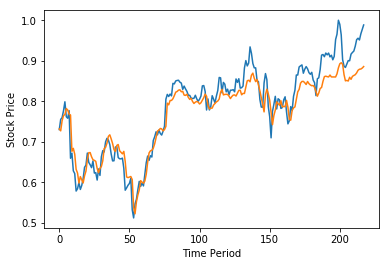

In [4]:
# ! python ./modules/rnn_stock_prediction.py
% run ./modules/rnn_stock_prediction.py

### Inspection :  rnn_stock_prediction

<hr>

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.set_random_seed(777)  # reproducibility


In [6]:
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

In [7]:
timesteps = seq_length = 7
data_dim = 5
output_dim = 1

# Open, High, Low, Volume, Close
xy = np.loadtxt('./data/data-02-stock_daily.csv', delimiter=',')
xy = xy[::-1]  # reverse order (chronically ordered)
xy = MinMaxScaler(xy)
x = xy
y = xy[:, [-1]]  # Close as label


In [8]:
x.shape, y.shape

((732, 5), (732, 1))

In [9]:
dataX = []
dataY = []
for i in range(0, len(y) - seq_length):
    _x = x[i:i + seq_length]
    _y = y[i + seq_length]  # Next close price
    # print(_x, "->", _y)
    dataX.append(_x)
    dataY.append(_y)

In [10]:
dataX[:3], dataY[:3]

([array([[2.13751054e-01, 2.08179810e-01, 1.91791832e-01, 4.66075110e-04,
          1.92092403e-01],
         [1.93935034e-01, 2.03641926e-01, 2.08664571e-01, 2.98467330e-03,
          1.96551555e-01],
         [2.10516454e-01, 2.05289413e-01, 2.03558748e-01, 2.59926504e-04,
          1.87749731e-01],
         [1.86678765e-01, 2.09480567e-01, 2.08781843e-01, 0.00000000e+00,
          2.17448151e-01],
         [3.06973882e-01, 3.14634137e-01, 2.18993665e-01, 1.24764722e-02,
          2.16981885e-01],
         [2.19142110e-01, 2.63907214e-01, 2.24686396e-01, 4.56323384e-01,
          2.24967473e-01],
         [2.33129931e-01, 2.36419163e-01, 1.62682724e-01, 5.70171193e-01,
          1.47442742e-01]]),
  array([[1.93935034e-01, 2.03641926e-01, 2.08664571e-01, 2.98467330e-03,
          1.96551555e-01],
         [2.10516454e-01, 2.05289413e-01, 2.03558748e-01, 2.59926504e-04,
          1.87749731e-01],
         [1.86678765e-01, 2.09480567e-01, 2.08781843e-01, 0.00000000e+00,
          2.174

In [11]:
# split to train and testing
train_size = int(len(dataY) * 0.7)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(
    dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(
    dataY[train_size:len(dataY)])

# input place holders
X = tf.placeholder(tf.float32, [None, seq_length, data_dim])
Y = tf.placeholder(tf.float32, [None, 1])

cell = tf.contrib.rnn.BasicLSTMCell(num_units=output_dim, state_is_tuple=True)
outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
Y_pred = outputs[:, -1]  # We use the last cell's output

print(outputs[:, -1])

# cost/loss
loss = tf.reduce_sum(tf.square(Y_pred - Y))  # sum of the squares
# optimizer
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

# RMSE
targets = tf.placeholder(tf.float32, [None, 1])
predictions = tf.placeholder(tf.float32, [None, 1])
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions)))


Tensor("strided_slice_1:0", shape=(?, 1), dtype=float32)


In [12]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in tqdm_notebook(range(500+1)):
    _, step_loss = sess.run([train, loss], feed_dict={X: trainX, Y: trainY})
    
    if i<10 or i%10==0:
        print("Step : {} \t Loss : {}".format(i, step_loss))
    

A Jupyter Widget

Step : 0 	 Loss : 11.187972068786621
Step : 1 	 Loss : 4.407001972198486
Step : 2 	 Loss : 10.18741226196289
Step : 3 	 Loss : 83.36129760742188
Step : 4 	 Loss : 44.158992767333984
Step : 5 	 Loss : 22.884599685668945
Step : 6 	 Loss : 18.876916885375977
Step : 7 	 Loss : 16.043540954589844
Step : 8 	 Loss : 13.746533393859863
Step : 9 	 Loss : 11.852485656738281
Step : 10 	 Loss : 10.27722454071045
Step : 20 	 Loss : 3.1805076599121094
Step : 30 	 Loss : 1.4784175157546997
Step : 40 	 Loss : 0.9745240807533264
Step : 50 	 Loss : 0.8066429495811462
Step : 60 	 Loss : 0.746195375919342
Step : 70 	 Loss : 0.7229294776916504
Step : 80 	 Loss : 0.7131869792938232
Step : 90 	 Loss : 0.7085282206535339
Step : 100 	 Loss : 0.7058306932449341
Step : 110 	 Loss : 0.703909695148468
Step : 120 	 Loss : 0.7023090124130249
Step : 130 	 Loss : 0.7008503675460815
Step : 140 	 Loss : 0.6994627714157104
Step : 150 	 Loss : 0.6981172561645508
Step : 160 	 Loss : 0.6968019008636475
Step : 170 	 Loss : 0

In [13]:
testPredict = sess.run(Y_pred, feed_dict={X: testX})
print("RMSE : ", sess.run(rmse, feed_dict={
      targets: testY, predictions: testPredict}))


RMSE :  0.037784047


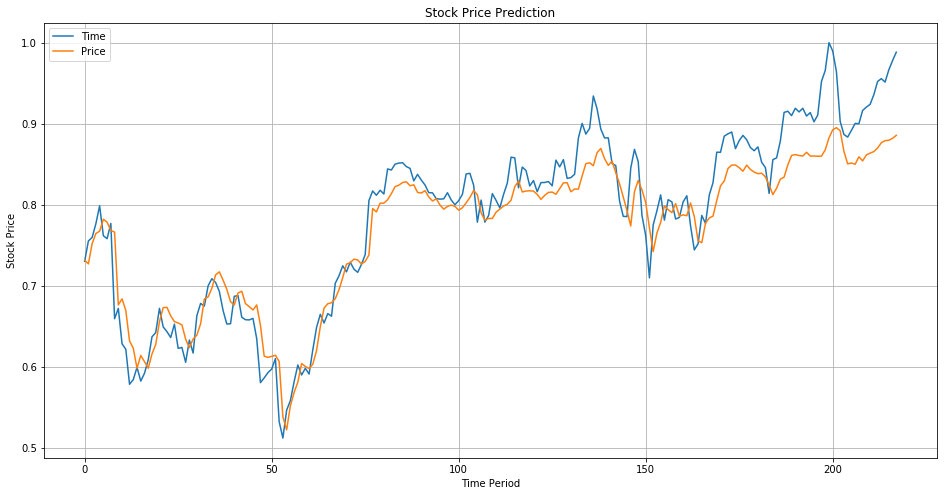

In [14]:
# %matplotlib notebook
# plt.rcParams["figure.figsize"] = [10,6]

%matplotlib inline
plt.rcParams["figure.figsize"] = [16,8]

plt.plot(testY, label='Time')
plt.plot(testPredict, label='Price')
plt.legend()
plt.grid()
plt.title('Stock Price Prediction')
plt.xlabel("Time Period")
plt.ylabel("Stock Price")
plt.show()


<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>